In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn import neighbors
import sklearn.metrics as metrics

In [2]:
dataset = pd.read_csv("zomato.csv")
dataset.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
dataset.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
dataset.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [6]:
dataset = dataset[dataset.cuisines.isna() == False]

In [7]:
dataset.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7741
votes                              0
phone                           1179
location                           0
rest_type                        206
dish_liked                     28033
cuisines                           0
approx_cost(for two people)      320
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
dataset.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [9]:
dataset.drop(["url","phone","address","listed_in(city)"], axis = 1, inplace=True)

In [10]:
dataset.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)'],
      dtype='object')

In [11]:
dataset.rename(columns ={'approx_cost(for two people)': 'avg_cost'}, inplace=True)
dataset.rename(columns ={'listed_in(type)': 'listed_type'}, inplace=True)

In [12]:
dataset.name.value_counts().head()

Cafe Coffee Day      96
Onesta               85
Just Bake            73
Empire Restaurant    71
Five Star Chicken    70
Name: name, dtype: int64

Text(0.5, 1.0, 'Restaurant Names vs No of locations')

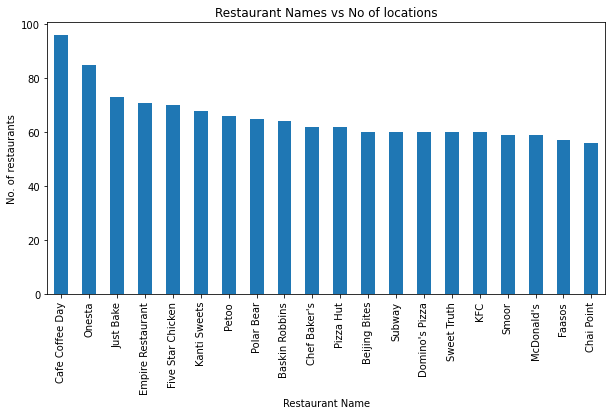

In [13]:
plt.figure(figsize = (10,5))
ax = dataset.name.value_counts()[:20].plot(kind = 'bar')
plt.xlabel("Restaurant Name")
plt.ylabel("No. of restaurants")
plt.title('Restaurant Names vs No of locations')

In [14]:
dataset.online_order.value_counts()

Yes    30428
No     21244
Name: online_order, dtype: int64

Text(0.5, 1.0, 'Online/Offline Orders Count')

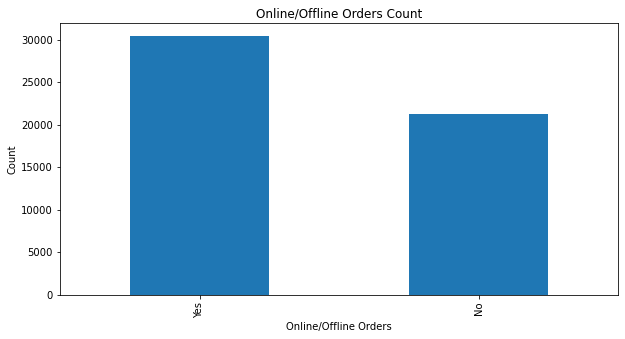

In [15]:
plt.figure(figsize=(10,5))
ax = dataset.online_order.value_counts().plot(kind = 'bar')
plt.xlabel("Online/Offline Orders")
plt.ylabel("Count")
plt.title("Online/Offline Orders Count")

In [16]:
dataset.book_table.value_counts()

No     45223
Yes     6449
Name: book_table, dtype: int64

Text(0.5, 1.0, 'Book Table Facility Counts')

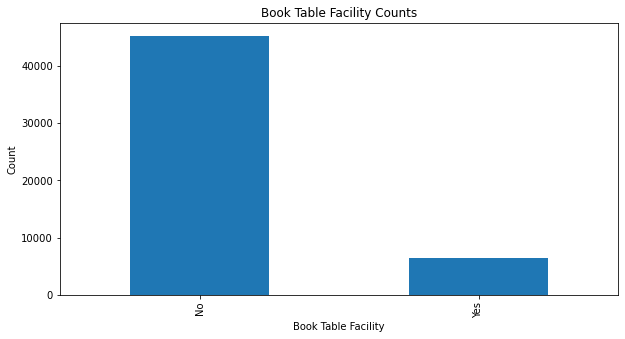

In [17]:
plt.figure(figsize=(10,5))
ax = dataset.book_table.value_counts().plot(kind = 'bar')
plt.xlabel("Book Table Facility")
plt.ylabel("Count")
plt.title("Book Table Facility Counts")

In [18]:
dataset.location.value_counts().head()

BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2233
Whitefield               2136
Name: location, dtype: int64

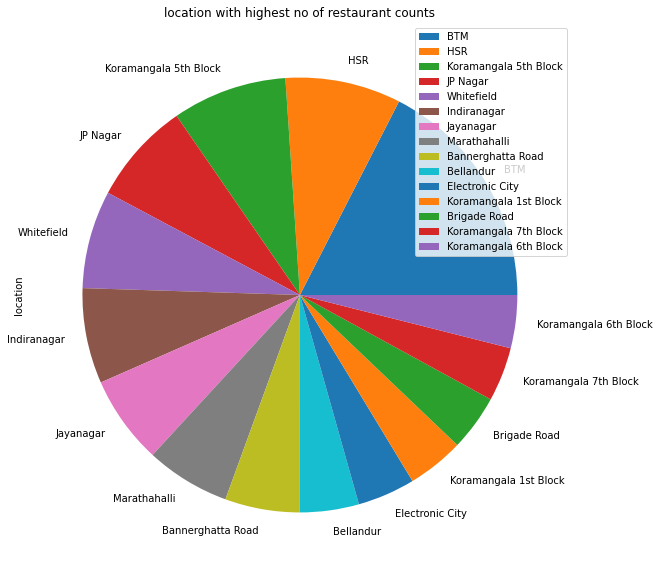

In [19]:
plt.figure(figsize=(10,10))
ax = dataset.location.value_counts()[:15].plot(kind = 'pie')
plt.title("location with highest no of restaurant counts")
plt.legend()

In [21]:
dataset.rest_type.value_counts().head()

Quick Bites       19129
Casual Dining     10326
Cafe               3732
Delivery           2595
Dessert Parlor     2262
Name: rest_type, dtype: int64

In [23]:
dataset.rate.value_counts().head()

NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
Name: rate, dtype: int64

In [24]:
dataset = dataset[dataset.rest_type.isna()==False]
dataset = dataset[dataset.rate.isna()==False]
dataset = dataset[dataset.rate != 'NEW']
dataset = dataset[dataset.rate != '-']
dataset['rate'] = dataset['rate'].apply(lambda r: r.replace('/5', ''))
dataset['rate'] = dataset['rate'].apply(lambda r: float(r))
dataset.rate.value_counts().head()

3.9    3969
3.8    3867
3.7    3817
3.6    3289
4.0    3176
Name: rate, dtype: int64

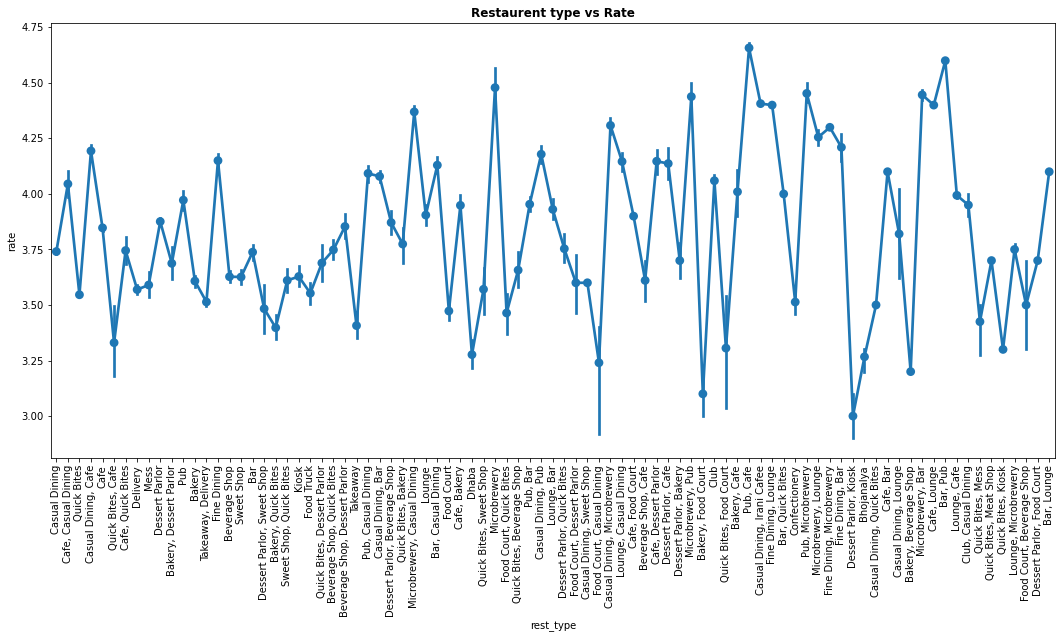

In [25]:
f,ax=plt.subplots(figsize=(18,8))
g = sns.pointplot(x=dataset["rest_type"], y=dataset["rate"], data=dataset)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Restaurent type vs Rate', weight = 'bold')
plt.show()

In [26]:
dataset.avg_cost.value_counts().head()

400    5265
300    5250
500    4081
600    3189
200    3164
Name: avg_cost, dtype: int64

In [28]:
dataset.dish_liked.value_counts().head(20)

Biryani                                                                               180
Friendly Staff                                                                         68
Waffles                                                                                67
Chicken Biryani                                                                        66
Paratha                                                                                56
Masala Dosa                                                                            56
Rooftop Ambience                                                                       42
Coffee                                                                                 41
Pizza                                                                                  38
Burgers                                                                                33
Cocktails                                                                              29
Mutton Bir

In [29]:
dataset_dish_liked = dataset[dataset.dish_liked.notnull()]
dataset_dish_liked.dish_liked = dataset_dish_liked.dish_liked.apply(lambda x:x.lower().strip())

liked_dish_count=[]
for dishes in dataset_dish_liked.dish_liked:
    for dish in dishes.split(','):
        liked_dish_count.append(dish.strip())
        
pd.Series(liked_dish_count).value_counts().head()

C:\Users\pjpun\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


pasta        3378
burgers      3015
cocktails    2796
pizza        2700
biryani      2071
dtype: int64

Text(0.5, 1.0, 'Most liked Dishes Count')

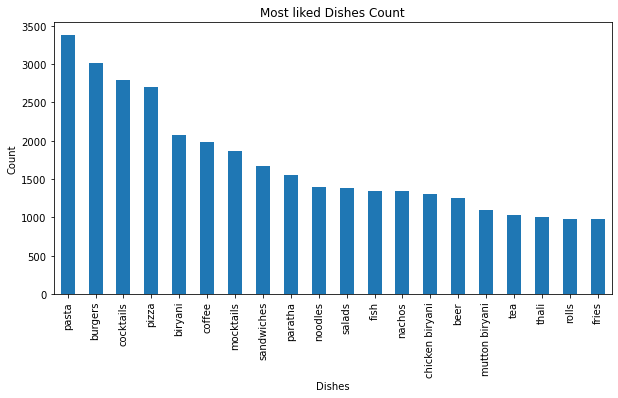

In [30]:
plt.figure(figsize=(10,5))
ax = pd.Series(liked_dish_count).value_counts()[:20].plot(kind = 'bar')
plt.xlabel("Dishes")
plt.ylabel("Count")
plt.title("Most liked Dishes Count")

In [31]:
#Encode the input Variables
def Encode(dataset):
    for column in dataset.columns[~dataset.columns.isin(['rate', 'votes'])]:
        dataset[column] = dataset[column].factorize()[0]
    return dataset

dataset_copy = Encode(dataset.copy())

In [ ]:
#Create model to predict restaurant rating

In [ ]:
#Drop columns not required colums

In [33]:
dataset.drop(["dish_liked","reviews_list","menu_item"], axis = 1, inplace = True)

In [34]:
dataset.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,avg_cost,listed_type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [35]:
dataset.isna().sum()

name              0
online_order      0
book_table        0
rate              0
votes             0
location          0
rest_type         0
cuisines          0
avg_cost        242
listed_type       0
dtype: int64

In [36]:
dataset.shape

(41505, 10)

In [37]:
dataset['avg_cost'] = dataset['avg_cost'].str.replace(',','')
dataset['avg_cost'] = dataset['avg_cost'].astype('float64')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41505 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41505 non-null  object 
 1   online_order  41505 non-null  object 
 2   book_table    41505 non-null  object 
 3   rate          41505 non-null  float64
 4   votes         41505 non-null  int64  
 5   location      41505 non-null  object 
 6   rest_type     41505 non-null  object 
 7   cuisines      41505 non-null  object 
 8   avg_cost      41263 non-null  float64
 9   listed_type   41505 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 4.7+ MB


In [38]:
dataset_not_na_avg_cost = dataset.groupby("listed_type")['avg_cost'].transform('mean')
dataset['avg_cost'].fillna(dataset_not_na_avg_cost, inplace =True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41505 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41505 non-null  object 
 1   online_order  41505 non-null  object 
 2   book_table    41505 non-null  object 
 3   rate          41505 non-null  float64
 4   votes         41505 non-null  int64  
 5   location      41505 non-null  object 
 6   rest_type     41505 non-null  object 
 7   cuisines      41505 non-null  object 
 8   avg_cost      41505 non-null  float64
 9   listed_type   41505 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 4.7+ MB


In [39]:
dataset.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,avg_cost,listed_type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [40]:
dataset['rest_type'] = dataset['rest_type'].str.replace(',','')
dataset['rest_type'] = dataset['rest_type'].astype('str').apply(lambda x: ' '.join(sorted(x.split())))

In [41]:
dataset['cuisines'] = dataset['cuisines'].str.replace(',','')
dataset['cuisines'] = dataset['cuisines'].astype('str').apply(lambda x: ' '.join(sorted(x.split())))

In [42]:
dataset.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,avg_cost,listed_type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Chinese Indian Mughlai North,800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,Chinese Indian North Thai,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,Cafe Casual Dining,Cafe Italian Mexican,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Bites Quick,Indian Indian North South,300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,Indian North Rajasthani,600.0,Buffet


In [43]:
dataset['online_order'] = pd.get_dummies(dataset['online_order'])
dataset['book_table'] = pd.get_dummies(dataset['book_table'])

In [44]:
dataset.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,avg_cost,listed_type
0,Jalsa,0,0,4.1,775,Banashankari,Casual Dining,Chinese Indian Mughlai North,800.0,Buffet
1,Spice Elephant,0,1,4.1,787,Banashankari,Casual Dining,Chinese Indian North Thai,800.0,Buffet
2,San Churro Cafe,0,1,3.8,918,Banashankari,Cafe Casual Dining,Cafe Italian Mexican,800.0,Buffet
3,Addhuri Udupi Bhojana,1,1,3.7,88,Banashankari,Bites Quick,Indian Indian North South,300.0,Buffet
4,Grand Village,1,1,3.8,166,Basavanagudi,Casual Dining,Indian North Rajasthani,600.0,Buffet


In [45]:
dataset_location = pd.get_dummies(dataset['location'])
dataset_rest_type = pd.get_dummies(dataset['rest_type'])
dataset_cuisines = pd.get_dummies(dataset['cuisines'])
dataset_listedin_type = pd.get_dummies(dataset['listed_type'])

In [46]:
dataset_final = pd.concat([dataset, dataset_cuisines, dataset_location, dataset_listedin_type, dataset_rest_type], axis=1)

In [47]:
dataset_final.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,avg_cost,listed_type,...,Food Truck,Kiosk,Lounge,Lounge Microbrewery,Mess,Microbrewery,Microbrewery Pub,Pub,Shop Sweet,Takeaway
0,Jalsa,0,0,4.1,775,Banashankari,Casual Dining,Chinese Indian Mughlai North,800.0,Buffet,...,0,0,0,0,0,0,0,0,0,0
1,Spice Elephant,0,1,4.1,787,Banashankari,Casual Dining,Chinese Indian North Thai,800.0,Buffet,...,0,0,0,0,0,0,0,0,0,0
2,San Churro Cafe,0,1,3.8,918,Banashankari,Cafe Casual Dining,Cafe Italian Mexican,800.0,Buffet,...,0,0,0,0,0,0,0,0,0,0
3,Addhuri Udupi Bhojana,1,1,3.7,88,Banashankari,Bites Quick,Indian Indian North South,300.0,Buffet,...,0,0,0,0,0,0,0,0,0,0
4,Grand Village,1,1,3.8,166,Basavanagudi,Casual Dining,Indian North Rajasthani,600.0,Buffet,...,0,0,0,0,0,0,0,0,0,0


In [48]:
dataset_final.drop(["location","rest_type","cuisines","listed_type"], axis = 1, inplace=True)
dataset_final.head()

,name,online_order,book_table,rate,votes,avg_cost,Afghan Arabian,Afghan Biryani Indian Mughlai North,Afghan Chinese Fast Food Gujarati Indian North Rajasthani,Afghan Indian Lucknowi North,...,Food Truck,Kiosk,Lounge,Lounge Microbrewery,Mess,Microbrewery,Microbrewery Pub,Pub,Shop Sweet,Takeaway
0,Jalsa,0,0,4.1,775,800.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Spice Elephant,0,1,4.1,787,800.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,San Churro Cafe,0,1,3.8,918,800.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Addhuri Udupi Bhojana,1,1,3.7,88,300.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Grand Village,1,1,3.8,166,600.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
X = dataset_final.drop(['name','rate'], axis = 1)
y = dataset_final['rate'].values

#Create train and test data

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

Train and test data with Linear Regression

In [51]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [52]:
y_pred = linear_regression.predict(X_test)
print(r2_score(y_test, y_pred, multioutput='uniform_average'))

-63598336836718.836


In [75]:
linear_df = pd.DataFrame(y_test, columns=['Actual'])
linear_df['Predicted'] = linear_regression.predict(X_test)
linear_df.head(10)

,Actual,Predicted
0,3.9,3.803227
1,3.4,3.571677
2,4.1,4.093359
3,3.8,3.672786
4,3.7,3.749723
5,3.8,3.811651
6,4.2,4.314722
7,3.0,3.424261
8,4.0,3.723054
9,3.9,3.790878


Train and test data with Ridge Regression

In [94]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [95]:
y_pred = ridge.predict(X_test)
print(r2_score(y_test, y_pred, multioutput='uniform_average'))

0.53967540391751


In [76]:
ridge_df = pd.DataFrame(y_test, columns=['Actual'])
ridge_df['Predicted'] = ridge.predict(X_test)
ridge_df.head(10)

,Actual,Predicted
0,3.9,3.790456
1,3.4,3.574641
2,4.1,4.081534
3,3.8,3.658231
4,3.7,3.751438
5,3.8,3.780241
6,4.2,4.315488
7,3.0,3.423612
8,4.0,3.722236
9,3.9,3.782958


Train and test data with Lasso Regression

In [55]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [56]:
y_pred = lasso.predict(X_test)
print(r2_score(y_test, y_pred, multioutput='uniform_average'))

0.2525500087676681


In [77]:
lasso_df = pd.DataFrame(y_test, columns=['Actual'])
lasso_df['Predicted'] = lasso.predict(X_test)
lasso_df.head(10)

,Actual,Predicted
0,3.9,3.631936
1,3.4,3.513306
2,4.1,3.757601
3,3.8,3.733671
4,3.7,3.544587
5,3.8,3.791553
6,4.2,3.937274
7,3.0,3.597169
8,4.0,3.807426
9,3.9,3.618964


Train and test data with Random Forest

In [57]:
random_forest = RandomForestRegressor(random_state=0, n_estimators=100)
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [59]:
y_pred = random_forest.predict(X_test)
print(r2_score(y_test, y_pred, multioutput='uniform_average'))

0.9244209749752624


In [78]:
rforest_df = pd.DataFrame(y_test, columns=['Actual'])
rforest_df['Predicted'] = random_forest.predict(X_test)
rforest_df.head(10)

,Actual,Predicted
0,3.9,3.704
1,3.4,3.312
2,4.1,4.103
3,3.8,3.918
4,3.7,3.639
5,3.8,3.740
6,4.2,4.200
7,3.0,3.000
8,4.0,4.032
9,3.9,3.904


Train and test data with Decision Tree

In [58]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [60]:
y_pred = decision_tree.predict(X_test)
print(r2_score(y_test, y_pred, multioutput='uniform_average'))

0.900206039928518


In [79]:
dtree_df = pd.DataFrame(y_test, columns=['Actual'])
dtree_df['Predicted'] = decision_tree.predict(X_test)
dtree_df.head(10)

,Actual,Predicted
0,3.9,3.9
1,3.4,3.4
2,4.1,4.1
3,3.8,4.0
4,3.7,3.7
5,3.8,3.8
6,4.2,4.2
7,3.0,3.0
8,4.0,4.0
9,3.9,3.9


Train and test data with SVM

In [61]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [62]:
y_pred = svr.predict(X_test)
print(r2_score(y_test, y_pred, multioutput='uniform_average'))

0.4058998103409237


In [80]:
svm_df = pd.DataFrame(y_test, columns=['Actual'])
svm_df['Predicted'] = svr.predict(X_test)
svm_df.head(10)

,Actual,Predicted
0,3.9,3.694913
1,3.4,3.485679
2,4.1,3.800458
3,3.8,3.991734
4,3.7,3.486713
5,3.8,3.632544
6,4.2,4.199012
7,3.0,3.523918
8,4.0,4.047678
9,3.9,4.076771


Train and test data with KNN

In [63]:
from sklearn import neighbors
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train, y_train)
model.best_params_

{'n_neighbors': 2}

In [64]:
knn=KNeighborsRegressor(n_neighbors = 2)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [65]:
y_pred = knn.predict(X_test)
print(r2_score(y_test, y_pred, multioutput='uniform_average'))

0.8099926593361104


In [81]:
knn_df = pd.DataFrame(y_test, columns=['Actual'])
knn_df['Predicted'] = knn.predict(X_test)
knn_df.head(10)

,Actual,Predicted
0,3.9,3.80
1,3.4,3.25
2,4.1,4.10
3,3.8,4.00
4,3.7,3.70
5,3.8,3.35
6,4.2,4.20
7,3.0,3.00
8,4.0,3.95
9,3.9,3.90


Train and test data with ExtraTreesRegressor

In [66]:
etree=ExtraTreesRegressor(n_estimators = 100)
etree.fit(X_train, y_train)

ExtraTreesRegressor()

In [67]:
y_pred = etree.predict(X_test)
print(r2_score(y_test, y_pred, multioutput='uniform_average'))

0.9444047875817874


Actual vs Predcted Test Data for ExtraTreesRegressor

In [68]:
etree_df = pd.DataFrame(y_test, columns=['Actual'])
etree_df['Predicted'] = etree.predict(X_test)
etree_df.corr()

,Actual,Predicted
Actual,1.000000,0.971812
Predicted,0.971812,1.000000


In [70]:
knn_df.head(40)

,Actual,Predicted
0,3.9,3.395
1,3.4,3.341
2,4.1,4.100
3,3.8,3.969
4,3.7,3.700
5,3.8,3.800
6,4.2,4.200
7,3.0,3.000
8,4.0,4.000
9,3.9,3.900


No handles with labels found to put in legend.


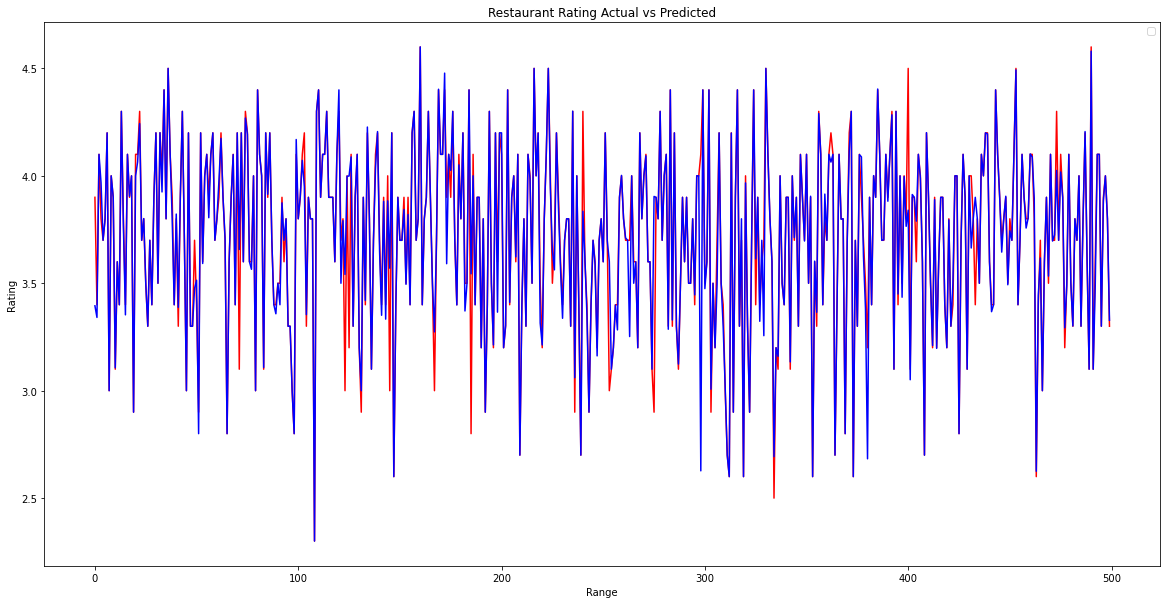

In [69]:
plt.figure(figsize=(20,10))
plt.plot(range(len(etree_df['Actual'].head(500))), etree_df['Actual'].head(500), color = "red")
plt.plot(range(len(etree_df['Predicted'].head(500))), etree_df['Predicted'].head(500), color = "blue")
plt.xlabel("Range")
plt.ylabel("Rating")
plt.title("Restaurant Rating Actual vs Predicted")
plt.legend()

Most important features and their contribution in model

In [71]:
feature_importance_df = pd.DataFrame(X_train.columns, columns=["Feature"])
feature_importance_df["Importance"] = etree.feature_importances_
feature_importance_df.sort_values('Importance', ascending=False, inplace=True)
feature_importance_df = feature_importance_df.head(20)
feature_importance_df

,Feature,Importance
2,votes,0.260509
1,book_table,0.167864
3,avg_cost,0.040489
1823,Bites Quick,0.015945
1260,Chinese Indian North,0.014992
0,online_order,0.014776
1834,Casual Dining,0.014722
1741,Koramangala 5th Block,0.010915
1846,Dessert Parlor,0.010501
1617,Indian North,0.010081


Text(0.5, 1.0, 'Plot Feature Importances')

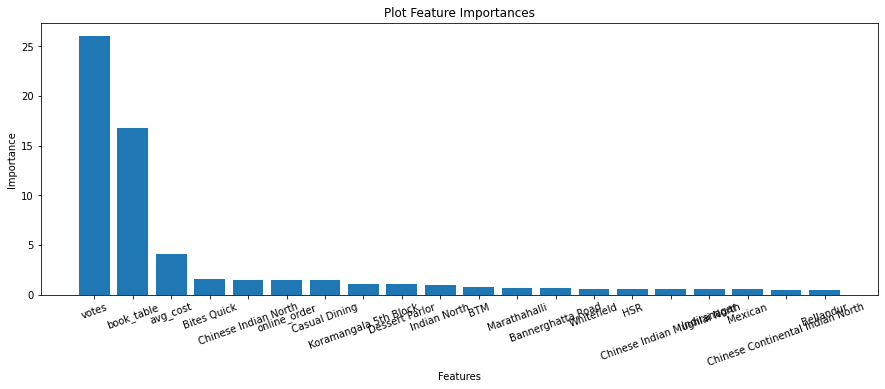

In [72]:
plt.figure(figsize=(15,5))
ax = feature_importance_df['Feature']
plt.bar(range(feature_importance_df.shape[0]), feature_importance_df['Importance']*100)
plt.xticks(range(feature_importance_df.shape[0]), feature_importance_df['Feature'], rotation = 20)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Plot Feature Importances")

# Conclusion

Ridge Regression : 53%
Lasso Regression : 25%
Random Forest: 92%
Decision Tree: 90%
SVM: 40%
KNN : 80%
Extra Tree: 94%

Better rating comes with more number of votes and it can increase your restaurant business